In [170]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.regularizers import l1
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
1 |	Trouser
2 |	Pullover
3 |	Dress
4 |	Coat
5 |	Sandal
6 |	Shirt
7 |	Sneaker
8 |	Bag
9 |	Ankle boot


In [295]:
# updatable plot

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

        
hist_details = PlotLosses()

In [296]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

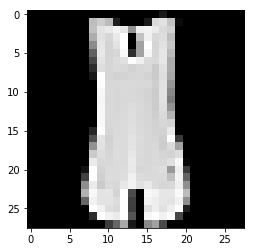

In [297]:
plt.imshow(x_train[4], cmap='gray')

In [298]:
x_train_ready = x_train.reshape(x_train.shape[0], 784)
x_test_ready = x_test.reshape(x_test.shape[0], 784)
# x_train = x_train.reshape(len(x_train), len(x_train[0])* len(x_train[0][0]))
# x_test = x_test.reshape(len(x_test), len(x_test[0])* len(x_test[0][0]))

In [300]:
np.shape(x_train_ready)

(60000, 784)

In [307]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [2]:
cnn = Sequential()
cnn.add(Conv2D(52, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(100, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [301]:
model = Sequential()
model.add(Dense(10, activation="tanh", input_shape=(784,)))
model.add(Dense(20, activation="tanh"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [303]:
np.shape(x_train)

(60000, 28, 28)

In [308]:
history_4 = model.fit(x_train_ready, y_train, epochs=50, validation_data=(x_test_ready, y_test), verbose=1)

Epoch 1/50
60000/60000 [==============================] - 6s 97us/step - loss: 1.5295 - acc: 0.3844
Epoch 2/50
60000/60000 [==============================] - 4s 60us/step - loss: 1.2234 - acc: 0.4971
Epoch 3/50
60000/60000 [==============================] - 4s 67us/step - loss: 1.1255 - acc: 0.5432
Epoch 4/50
60000/60000 [==============================] - 4s 64us/step - loss: 1.1309 - acc: 0.5386
Epoch 5/50
60000/60000 [==============================] - 4s 63us/step - loss: 1.1472 - acc: 0.5221
Epoch 6/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.9497 - acc: 0.6419
Epoch 7/50
60000/60000 [==============================] - 4s 65us/step - loss: 1.0141 - acc: 0.6038
Epoch 8/50
60000/60000 [==============================] - 4s 63us/step - loss: 1.0305 - acc: 0.5936
Epoch 9/50
60000/60000 [==============================] - 4s 64us/step - loss: 1.1047 - acc: 0.5650
Epoch 10/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.9916 - acc: 0.6261

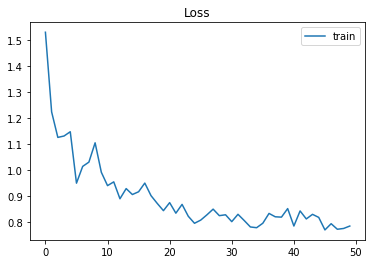

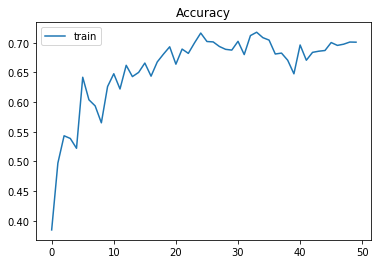

In [310]:
#Tanh + tanh
plt.plot(history_4.history["loss"], label="train")
# plt.plot(history_4.history["val_loss"], label="test")
plt.title("Loss")
plt.legend()

plt.figure()

plt.plot(history_4.history["acc"], label="train")
# plt.plot(history_4.history["val_acc"], label="test")
plt.title("Accuracy")
plt.legend()

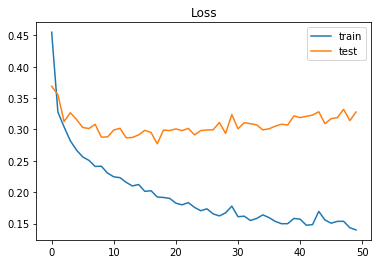

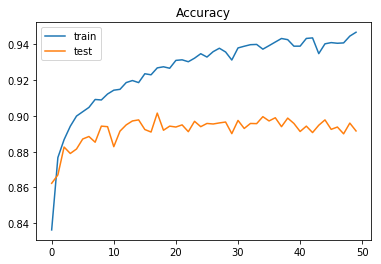

In [214]:
#Tanh + Relu
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.title("Loss")
plt.legend()

plt.figure()

plt.plot(history.history["acc"], label="train")
plt.plot(history.history["val_acc"], label="test")
plt.title("Accuracy")
plt.legend()

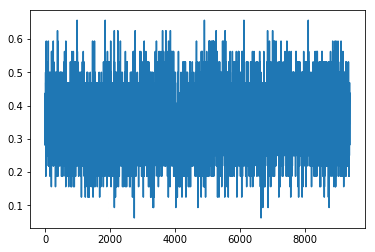

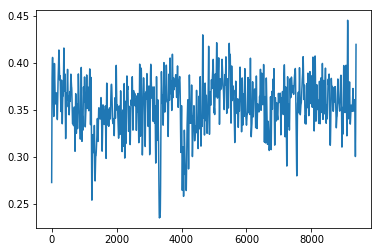

In [187]:
fc = 30  # Cut-off frequency of the filter
fs = 1000
w = fc / (fs / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'low')
_signal = hist_details.acc
output = signal.filtfilt(b, a, _signal)
plt.plot(_signal)
plt.figure()
plt.plot(output)